# Problem 4.2: Shuffled Cards - data reader

The following is a small program to read the data file "data_ShuffledCards.txt", which contains four columns: Number in deck, Card name, Value, and Suit.

### Author & Date: 
- Troels C. Petersen (Niels Bohr Institute)
- 07-11-2021

***

In [20]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import random

In [21]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [22]:
# Read the data and print it to check it:
import numpy as np

data = np.genfromtxt("./data_ShuffledCards.txt", skip_header=2)
number = data[:,0]
value = data[:,4]
suit = data[:,5]
'''
print("Number of entries: ", len(number))
for i in range(len(number)) : 
    print(f"  {int(number[i]):2.0f}:  {value[i]:4.0f}   {suit[i]:3.0f}")
'''

'\nprint("Number of entries: ", len(number))\nfor i in range(len(number)) : \n    print(f"  {int(number[i]):2.0f}:  {value[i]:4.0f}   {suit[i]:3.0f}")\n'

In [23]:
N_Group = 100  # 100组
N_experiment = 200  # 1000次试验
N = 4

d_value = np.zeros(N)
d_Group = []
sum_1 = []

for i_2 in range(0,N_experiment):

    for j in range(0,N_Group):  # 1000组
        draw_out = random.choices(data, k=4)  # 随机抽4张牌

        for k in range (0,4):
            d_value[k] = draw_out[k][4]
        d_Group = np.append(d_Group,d_value)


In [24]:
# Fill 1d histograms:
def create_1d_hist(ax, values, bins, x_range, title):
    ax.hist(values, bins, x_range, histtype='step', density=False, lw=2)         
    ax.set(xlim=x_range, title=title)
    hist_data = np.histogram(values, bins, x_range)
    return hist_data

# Calculate the ChiSquare value for comparison of histogram with constant.
# This is not a fit, as there are no free parameters: We know the number of events and bins!
def get_chi2_ndf( hist, const):
    data = hist[0]
    const_unnormed = const * data.sum()
    chi2 = np.sum( (data - const_unnormed)**2 / data )
    ndof = data.size
    return chi2, ndof

73879 80000


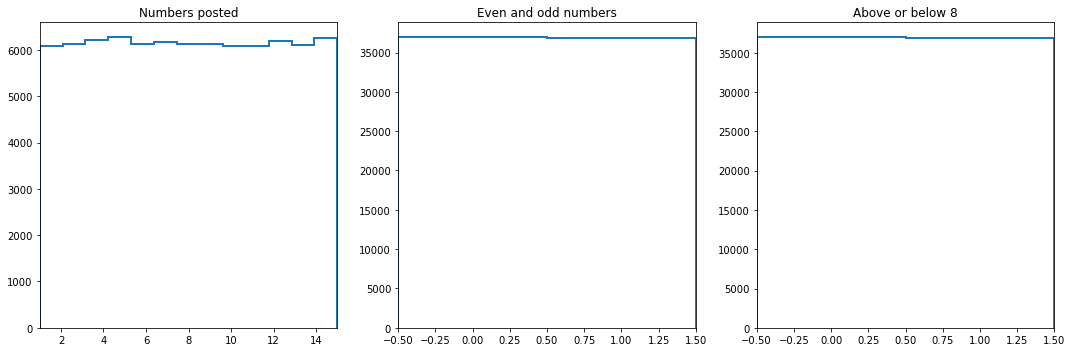

In [25]:
a_array = []

for m in range(0,N_Group*N_experiment*N):
    if d_Group[m] != 8:
        a_array = np.append(a_array,d_Group[m])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax_number, ax_odd_even, ax_high_low = ax.flatten()

print(a_array.size,d_Group.size)
# Fill 1d histograms and plot them:
hist_numbers  = create_1d_hist(ax_number,   d_Group,     13, (1, 15), 'Numbers posted')                # Plot all digits
hist_odd_even = create_1d_hist(ax_odd_even, a_array % 2,  2, (-0.5, 1.5), 'Even and odd numbers')          # Is number even or odd
hist_high_low = create_1d_hist(ax_high_low, a_array // 8, 2, (-0.5, 1.5), 'Above or below 8') # Is number >= or < 5
fig.tight_layout()
fig.savefig("ifShuffled.png", dpi=600)

In [26]:
chi2_ndf_number_hist   = get_chi2_ndf( hist_numbers,  1.0 / 13)
chi2_ndf_odd_even_hist = get_chi2_ndf( hist_odd_even, 1.0 / 2 )
chi2_ndf_high_low_hist = get_chi2_ndf( hist_high_low, 1.0 / 2 )
print(chi2_ndf_number_hist)

(8.31307475793907, 13)


In [27]:
# Write your result: 
print("Compatability that distributions stem from random numbers : ")
print("Raw digits: Prob(Chi2={:6.2f}, Ndof={:2d}) = {:10.8f}".format(chi2_ndf_number_hist[0], chi2_ndf_number_hist[1], 
                                                             stats.chi2.sf(chi2_ndf_number_hist[0], chi2_ndf_number_hist[1])))
print("Odd/Even:   Prob(Chi2={:6.2f}, Ndof={:2d}) = {:10.8f}".format(chi2_ndf_odd_even_hist[0], chi2_ndf_odd_even_hist[1], 
                                                             stats.chi2.sf(chi2_ndf_odd_even_hist[0], chi2_ndf_odd_even_hist[1])))
print("High/Low:   Prob(Chi2={:6.2f}, Ndof={:2d}) = {:10.8f}".format(chi2_ndf_high_low_hist[0], chi2_ndf_high_low_hist[1], 
                                                             stats.chi2.sf(chi2_ndf_high_low_hist[0], chi2_ndf_high_low_hist[1])))

Compatability that distributions stem from random numbers : 
Raw digits: Prob(Chi2=  8.31, Ndof=13) = 0.82262279
Odd/Even:   Prob(Chi2=  0.08, Ndof= 2) = 0.95864157
High/Low:   Prob(Chi2=  0.33, Ndof= 2) = 0.84993308
